In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0         0           0
196    39  32.800         0         0           0
438    52  46.750         5         0           0
183    44  26.410         0         0           0
1298   33  27.455         2         1           0
...   ...     ...       ...       ...         ...
763    27  26.030         0         1           0
835    42  35.970         2         1           0
1216   40  25.080         0         1           0
559    19  35.530         0         1           0
684    33  18.500         1         0           0

[936 rows x 5 columns]
          charges
1163   2200.83085
196    5649.71500
438   12592.53450
183    7419.47790
1298   5261.46945
...           ...
763    3070.80870
835    7160.33030
1216   5415.66120
559    1646.42970
684    4766.02200

[936 rows x 1 columns]
      age     bmi  children  sex_male  smoker_yes
578    52  30.200         1         1           0
610    47  29.370         1         

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train
X_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error',max_features='log2',splitter='best')
regressor=regressor.fit(X_train,Y_train)

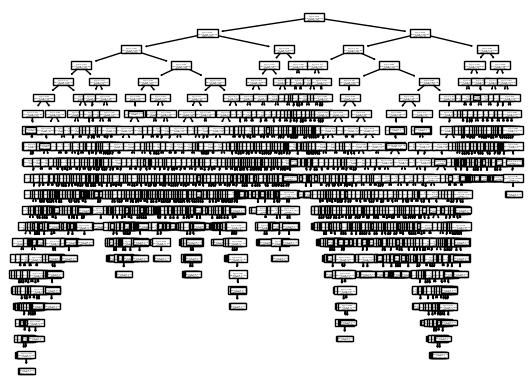

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [11]:
Y_predict=regressor.predict(X_test)
Y_predict

array([11763.0009  ,  8930.93455 , 44202.6536  , 12741.16745 ,
        9264.797   , 21984.47061 ,  1615.7667  , 10381.4787  ,
        6571.544   ,  5253.524   ,  6402.29135 , 11015.1747  ,
        7345.7266  ,  4571.41305 , 35147.52848 , 11015.1747  ,
        9863.4718  ,  3292.52985 ,  6455.86265 , 33307.5508  ,
       23306.547   , 10928.849   ,  9625.92    , 23887.6627  ,
        1826.843   , 18963.17192 ,  2457.502   ,  8252.2843  ,
        3757.8448  ,  8027.968   ,  8252.2843  , 42211.1382  ,
       12981.3457  ,  9504.3103  , 16657.71745 ,  3554.203   ,
        8733.22925 , 38711.      , 39125.33225 ,  1880.07    ,
        5266.3656  ,  2866.091   , 17904.52705 , 47269.854   ,
       37133.8982  ,  3579.8287  , 11015.1747  ,  6272.4772  ,
        4719.52405 ,  8539.671   , 13126.67745 ,  4296.2712  ,
       28868.6639  , 46661.4424  , 12231.6136  , 19673.33573 ,
        2727.3951  ,  8782.469   ,  7441.501   ,  9863.4718  ,
        1639.5631  , 46130.5265  , 15161.5344  , 25333.

In [12]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_predict)
r2

0.7060424618001246

In [13]:
import numpy as np
Ytest= np.array(Y_test).flatten()
Ypredict= np.array(Y_predict).flatten()
residuals=Ytest-Ypredict
residuals

array([-2.03847090e+03, -3.83243250e+02,  1.49936875e+03,  2.08903750e+02,
        3.79455500e+02, -1.74841314e+04,  5.82423150e+02,  1.05525945e+03,
        9.65619900e+02,  1.71499350e+02,  3.50746650e+02, -5.21228900e+02,
       -7.97860000e+00, -3.86315150e+02, -1.68367865e+04, -3.12532300e+02,
        2.66013300e+03,  1.98019250e+02,  1.98075000e+00,  1.68266350e+02,
        6.60836050e+02,  1.71452880e+03,  1.34196462e+04, -8.22242000e+02,
       -1.52210700e+02, -1.42955643e+04,  1.27512310e+03, -5.69614300e+02,
       -1.22320000e+00,  3.85495050e+02, -1.92605200e+02,  6.75910940e+03,
       -1.98770000e+00,  1.11259732e+04, -2.08582665e+03,  5.83319700e+02,
       -3.86064950e+02,  1.24835591e+04,  8.78000000e+02,  4.17000000e-01,
        1.91680850e+02,  1.02860000e+00,  2.24479585e+03,  2.26640450e+02,
       -9.84414700e+02,  2.24391218e+04,  8.73420868e+03,  6.68432650e+02,
       -1.32050000e+00,  1.36527661e+04, -1.02271881e+04,  1.45424325e+04,
       -5.30039190e+03, -

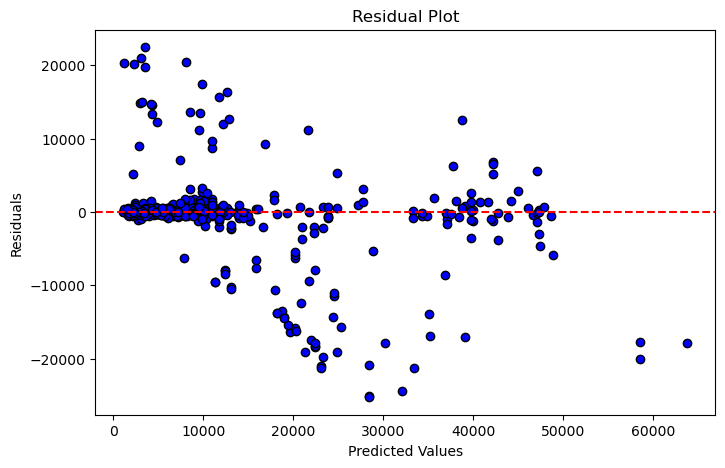

In [14]:
import matplotlib.pyplot as plt
# Plotting residuals
plt.figure(figsize=(8, 5))
plt.scatter(Ypredict, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()